### A notebook for data analysis of the sensitivity analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Specify the experiment wanted
value_to_vary_name = "preference-penalty-parking-outside-neighbourhood"
v = 0.4
replications = 6

# Read the pickle
series_df = pd.read_pickle(f'../results/sensitivity/sens_series_{value_to_vary_name}_{v}_{replications}r_df.pickle')
series_df.head()

,monthly-car-trips,monthly-shared-car-trips,monthly-public-transport-trips,monthly-bike-trips,count cars,shared-car-subscriptions,public-transport-subscriptions,mean-car-preference,monthly-car-trips,monthly-shared-car-trips,...,public-transport-subscriptions,mean-car-preference,monthly-car-trips,monthly-shared-car-trips,monthly-public-transport-trips,monthly-bike-trips,count cars,shared-car-subscriptions,public-transport-subscriptions,mean-car-preference
,0,0,0,0,0,0,0,0,1,1,...,4,4,5,5,5,5,5,5,5,5
0.0,0.0,0.0,0.0,0.0,1211.0,62.0,649.0,0.696224,0.0,0.0,...,632.0,0.701793,0.0,0.0,0.0,0.0,1252.0,57.0,614.0,0.702259
1.0,50998.0,1919.0,22063.0,10385.0,1201.0,83.0,633.0,0.694122,51508.0,1970.0,...,637.0,0.702931,52802.0,1924.0,20241.0,9837.0,1240.0,72.0,611.0,0.701902
2.0,50675.0,1826.0,22486.0,10256.0,1180.0,106.0,602.0,0.692774,50964.0,1912.0,...,626.0,0.703455,52406.0,1806.0,21022.0,9538.0,1209.0,103.0,590.0,0.70081
3.0,50551.0,1743.0,23199.0,10225.0,1164.0,109.0,627.0,0.692171,50407.0,1911.0,...,639.0,0.703789,51402.0,1828.0,22142.0,9497.0,1200.0,107.0,592.0,0.700789
4.0,49984.0,1825.0,23732.0,9911.0,1160.0,118.0,657.0,0.69169,50001.0,1900.0,...,639.0,0.703892,50888.0,1791.0,22496.0,9606.0,1183.0,114.0,609.0,0.700599


<Axes: >

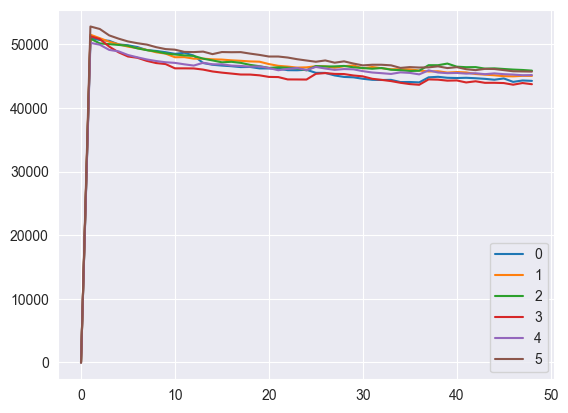

In [3]:
# Plot for one run all the variables
series_df["monthly-car-trips"].plot()

<Axes: >

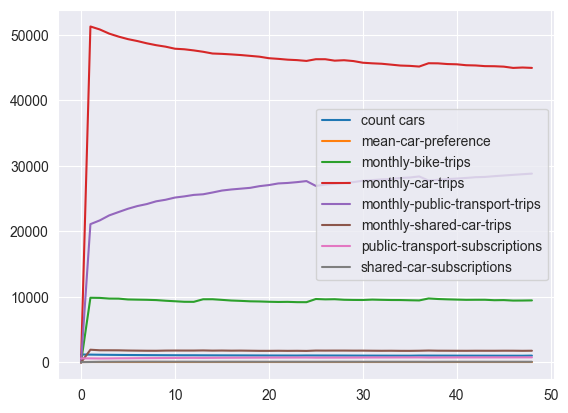

In [4]:
# Take the average of all the runs and plot those
series_df_agg = series_df.groupby(level=[0], axis="columns").mean()
series_df_agg.plot()

## Full sensitivity analysis

### Load data

In [5]:
modalities = ["car", "shared-car", "public-transport", "bike"]

KPIs = [
    *[f"monthly-{m}-trips" for m in modalities],
    "count cars",
    "shared-car-subscriptions",
    "public-transport-subscriptions",
    "mean-car-preference",
]

In [6]:
sens_design = pd.read_excel("../sensitivity-analysis-design.xlsx")
n_vars = len(sens_design.index)
vars = sens_design["Variable"].to_list()

In [7]:
reference = f'../results/sensitivity/sens_series_default_12r_df.pickle'

In [8]:
def create_df(abs=True, t=48):
    # Read all the pickles into a dictionary of dataframes
    dfs = {}

    if abs:
        dfs[("Reference", "Reference")] = pd.read_pickle(reference)

    for index, row in sens_design.iterrows():
        var = row["Variable"]
        low = row["Low"]
        mid = row["Default"]
        high = row["High"]

        if var not in ["initial-car-preference", "initial-public-transport-preference"]:
            replications = 6
        else:
            replications = 12

        # Define dict
        if abs:
            dfs[(var, "-20%")] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{low}_{replications}r_df.pickle')
            dfs[(var, "+20%")] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{high}_{replications}r_df.pickle')
        else:
            dfs[(var, low)] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{low}_{replications}r_df.pickle')
            dfs[(var, mid)] = pd.read_pickle(reference)
            dfs[(var, high)] = pd.read_pickle(f'../results/sensitivity/sens_series_{var}_{high}_{replications}r_df.pickle')

    # Create a dictionary with the values of the last tick
    end_dict = {}
    for (k, v), df_t in dfs.items():
        end_dict[(k, v)] = df_t.iloc[t]

    # Create multi-indexed DataFrame from dict
    end_df = pd.DataFrame.from_dict(end_dict)

    return end_df

### Absolute ranges

In [9]:
abs_df = create_df(True)
abs_df

Reference subscription-monthly-buy-sell-chance  \
                            Reference                                 -20%   
count cars               0     1052.0                               1048.0   
                         1     1095.0                               1037.0   
                         2     1044.0                               1055.0   
                         3     1024.0                               1079.0   
                         4     1030.0                               1005.0   
...                               ...                                  ...   
shared-car-subscriptions 7       96.0                                  NaN   
                         8      102.0                                  NaN   
                         9      117.0                                  NaN   
                         10     110.0                                  NaN   
                         11     112.0                                  NaN   

                                     \
                               +20%   
count cars               0   1041.0   
                         1   1083.0   
                         2   1057.0   
                         3   1032.0   
                         4   1047.0   
...                             ...   
shared-car-subscriptions 7      NaN   
                         8      NaN   
                         9      NaN   
                         10     NaN   
                         11     NaN   

                            preference-penalty-parking-outside-neighbourhood  \
                                                                        -20%   
count cars               0                                            1026.0   
                         1                                            1061.0   
                         2                                            1048.0   
                         3                                            1019.0   
                         4                                            1056.0   
...                                                                      ...   
shared-car-subscriptions 7                                               NaN   
                         8                                               NaN   
                         9                                               NaN   
                         10                                              NaN   
                         11                                              NaN   

                                    mean-value-of-time          \
                               +20%               -20%    +20%   
count cars               0   1058.0              930.0  1088.0   
                         1   1038.0              910.0  1147.0   
                         2   1053.0              904.0  1206.0   
                         3   1046.0              881.0  1166.0   
                         4   1014.0              951.0  1137.0   
...                             ...                ...     ...   
shared-car-subscriptions 7      NaN                NaN     NaN   
                         8      NaN                NaN     NaN   
                         9      NaN                NaN     NaN   
                         10     NaN                NaN     NaN   
                         11     NaN                NaN     NaN   

                            social-adoption-multiplier          \
                                                  -20%    +20%   
count cars               0                      1072.0  1076.0   
                         1                      1030.0  1031.0   
                         2                      1017.0  1051.0   
                         3                      1038.0  1063.0   
                         4                      1066.0  1112.0   
...                                                ...     ...   
shared-car-subscriptions 7                         NaN     NaN   
           

In [10]:
KPIs_to_drop = []
KPIs2 = [k for k in KPIs if k not in KPIs_to_drop]

In [11]:
plot_df = {}
for k in KPIs2:
    plot_df[k] = abs_df.T[k].stack(level=0).reset_index()
    plot_df[k].columns = ["Variable", "Value", "Replication", "Result"]
plot_df[KPIs2[0]].head()

,Variable,Value,Replication,Result
0,Reference,Reference,0,46590.0
1,Reference,Reference,1,45801.0
2,Reference,Reference,2,44466.0
3,Reference,Reference,3,43631.0
4,Reference,Reference,4,45013.0


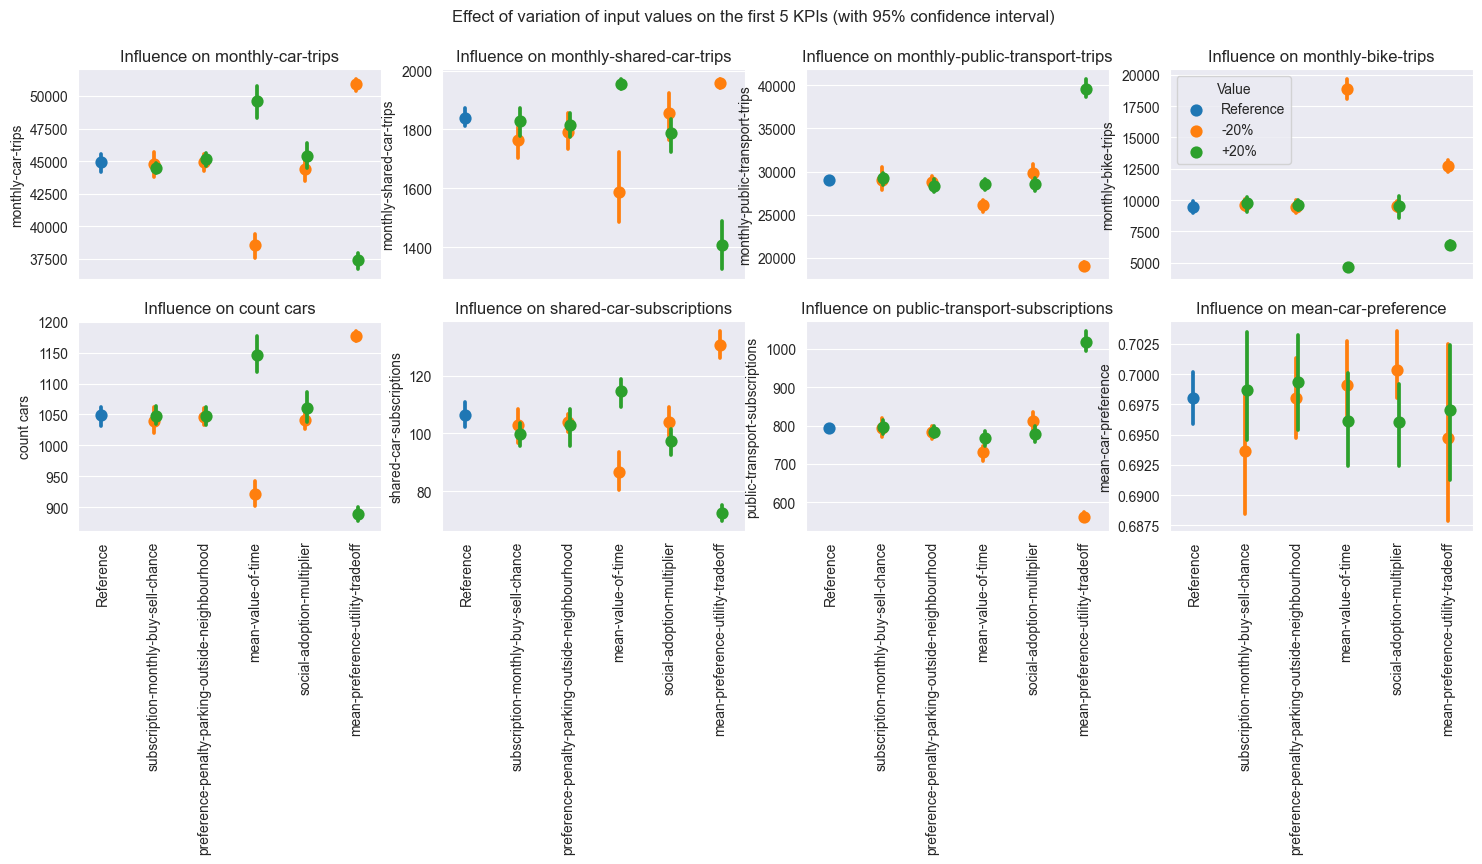

In [12]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(18,6)
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[:5] + ["Reference"])].copy()
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Value", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90,)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    g[KPI].set_ylabel(f"{KPI}")
    # Remove the legend except the fourth plot
    if i != 3:
        g[KPI].legend_.remove()
fig.suptitle("Effect of variation of input values on the first 5 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_abs_1.svg", bbox_inches="tight")

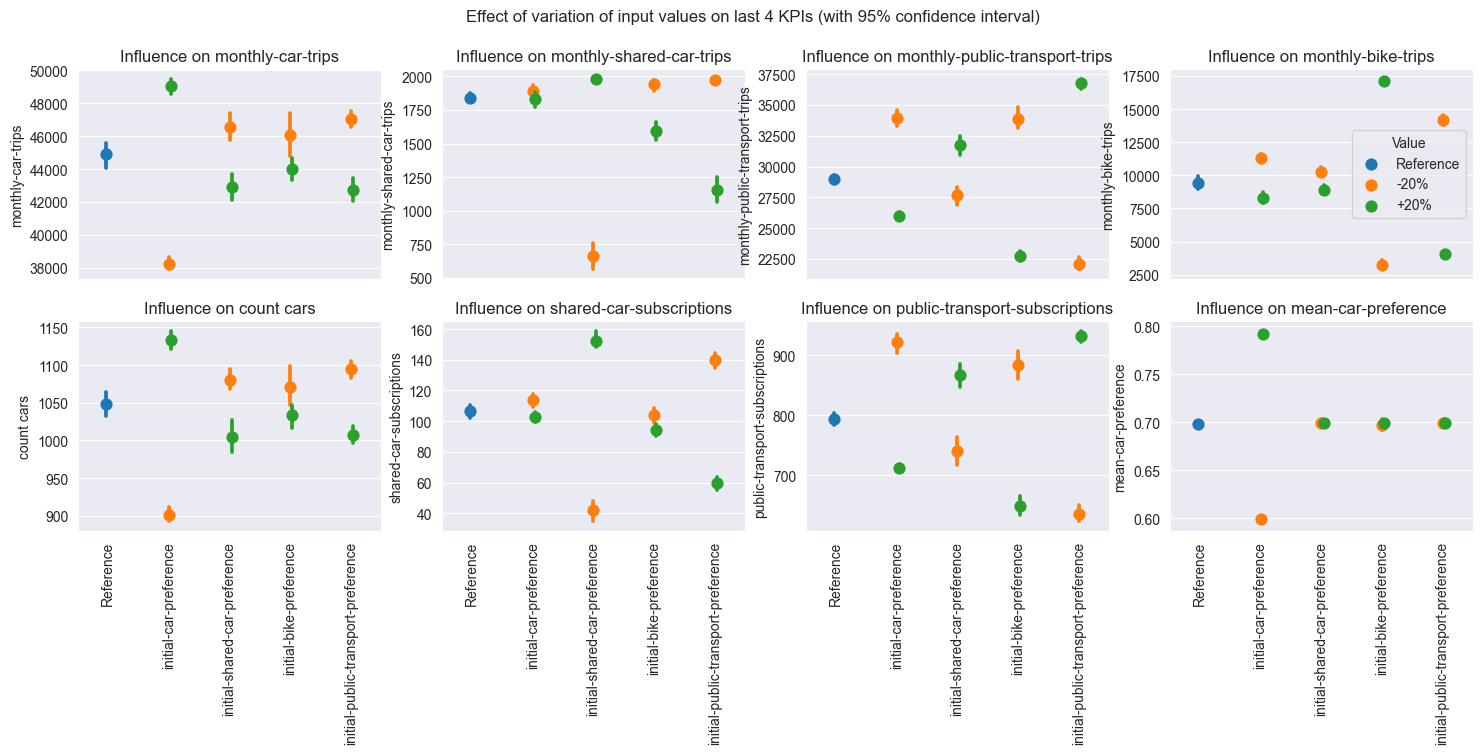

In [13]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(18,6)
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[5:] + ["Reference"])].copy()
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Value", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90,)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    g[KPI].set_ylabel(f"{KPI}")
    # Remove the legend except the fourth plot
    if i != 3:
        g[KPI].legend_.remove()
fig.suptitle("Effect of variation of input values on last 4 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_abs_2.svg", bbox_inches="tight")

### Normalize sensitivity

In [14]:
norm_df = create_df(False)

In [15]:
dev_df = pd.DataFrame(index=norm_df.index)
for var in sens_design["Variable"].to_list():
    # Get the reference column for that variable
    ref = norm_df[var].columns[1]
    # Transform the reference column to contain the mean of all replications for that variable
    ref_mean = norm_df[var][ref].groupby(level=0).transform('mean')

    # For each column, calculate the deviation
    for i, column in enumerate(norm_df[var].columns):
        if i != 1:
            ratio = column/ref
            dev_df[var, ratio] = (norm_df[var][column] - ref_mean) / norm_df[var][ref]
dev_df.columns = pd.MultiIndex.from_tuples(dev_df.columns)
dev_df.T

count cars  \
                                                                  0    
subscription-monthly-buy-sell-chance             0.800000  -0.000396   
                                                 1.200000   -0.00705   
preference-penalty-parking-outside-neighbourhood 0.800000  -0.021309   
                                                 1.200000    0.00911   
mean-value-of-time                               0.800000  -0.112563   
                                                 1.200000   0.037627   
social-adoption-multiplier                       0.800000   0.022418   
                                                 1.200000    0.02622   
mean-preference-utility-tradeoff                 0.800000   0.133634   
                                                 1.200000  -0.136328   
initial-car-preference                           0.857143  -0.104008   
                                                 1.142857   0.047132   
initial-shared-car-preference                    0.800000   0.034775   
                                                 1.200000  -0.046023   
initial-bike-preference                          0.800000   0.081353   
                                                 1.200000  -0.003248   
initial-public-transport-preference              0.666667   0.070897   
                                                 1.333333  -0.030814   

                                                                               \
                                                                 1         2    
subscription-monthly-buy-sell-chance             0.800000 -0.010426  0.006306   
                                                 1.200000  0.031583  0.008222   
preference-penalty-parking-outside-neighbourhood 0.800000  0.011492 -0.000399   
                                                 1.200000 -0.009513   0.00439   
mean-value-of-time                               0.800000 -0.126408  -0.13833   
                                                 1.200000   0.09003  0.150942   
social-adoption-multiplier                       0.800000 -0.016819 -0.030093   
                                                 1.200000 -0.015906  0.002474   
mean-preference-utility-tradeoff                 0.800000  0.130213  0.122206   
                                                 1.200000 -0.159285 -0.167066   
initial-car-preference                           0.857143 -0.126408 -0.161319   
                                                 1.142857  0.065373  0.089639   
initial-shared-car-preference                    0.800000  0.037062    0.0178   
                                                 1.200000 -0.071613 -0.065533   
initial-bike-preference                          0.800000 -0.004947 -0.009978   
                                                 1.200000 -0.044216  -0.02243   
initial-public-transport-preference              0.666667  0.028843  0.064735   
                                                 1.333333 -0.014992 -0.012851   

                                                                               \
                                                                 3         4    
subscription-monthly-buy-sell-chance             0.800000  0.029867 -0.042152   
                                                 1.200000 -0.016032 -0.001375   
preference-penalty-parking-outside-neighbourhood 0.800000 -0.028727  0.007362   
                                                 1.200000  -0.00236 -0.033414   
mean-value-of-time                               0.800000 -0.163493 -0.094579   
                                                 1.200000  0.114827  0.086003   
social-adoption-multiplier                       0.800000 -0.010173  0.017071   
                                                 1.200000  0.014242  0.061731   
mean-preference-utility-tradeoff                 0.800000  0.106038  0.125809   
                                                 1.200000 -0.138102 -0.142152   
initial-car-preference  

In [16]:
plot_df = {}
for k in KPIs2:
    plot_df[k] = dev_df.T[k].stack(level=0).reset_index()
    plot_df[k].columns = ["Variable", "Deviation", "Replication", "Result"]
    plot_df[k]["Deviation"] = plot_df[k]["Deviation"].round(2)
plot_df[KPIs2[0]].head()

,Variable,Deviation,Replication,Result
0,subscription-monthly-buy-sell-chance,0.8,0,-0.009823
1,subscription-monthly-buy-sell-chance,0.8,1,0.00909
2,subscription-monthly-buy-sell-chance,0.8,2,0.016559
3,subscription-monthly-buy-sell-chance,0.8,3,0.038329
4,subscription-monthly-buy-sell-chance,0.8,4,-0.039959


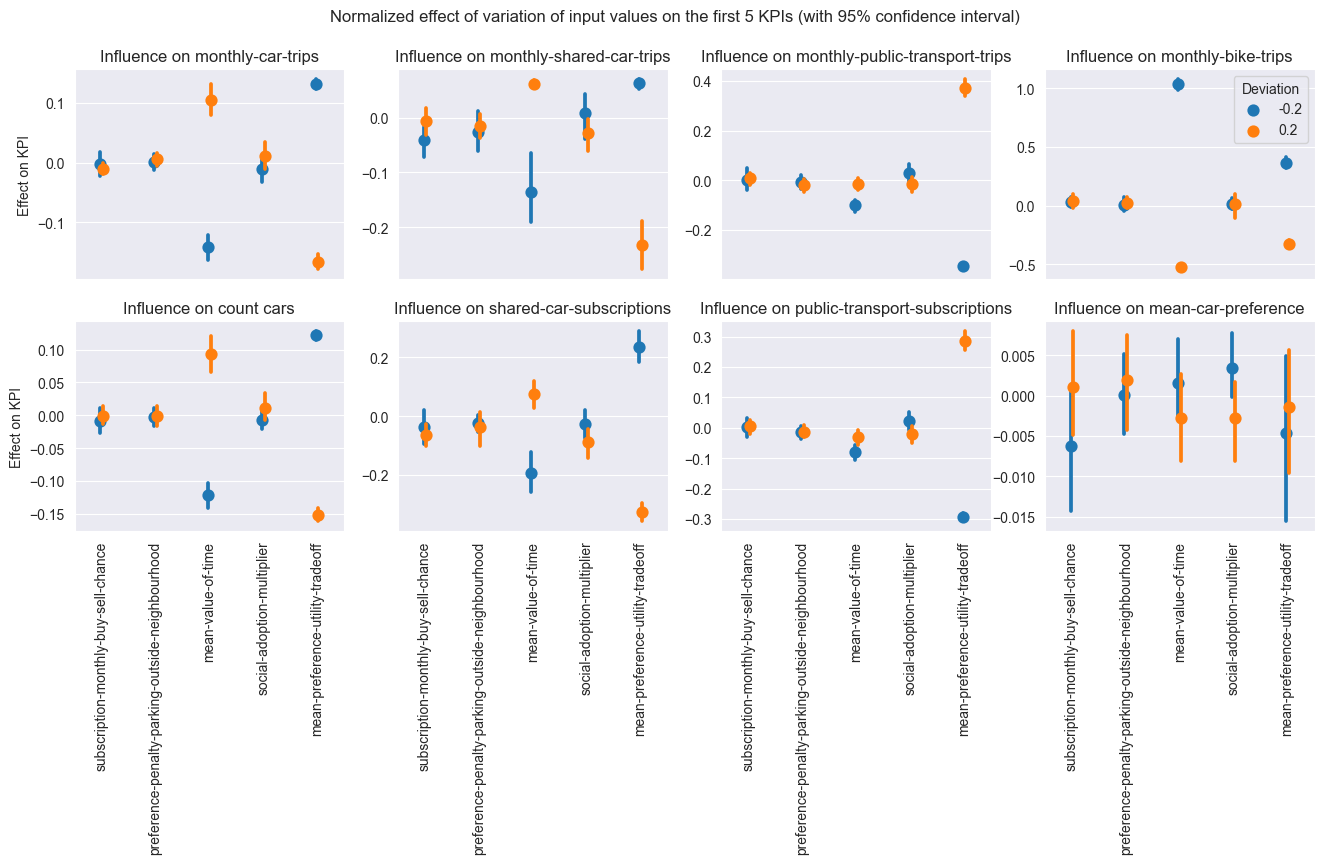

In [17]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(16,6)
sample = None
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[:5] + ["Reference"])].copy()
    df_t["Deviation"] = (df_t["Deviation"] - 1).round(2)
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Deviation", errorbar=('ci', 95), join=False, dodge=True, ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    if i == 0 or i == 4:
        g[KPI].set_ylabel("Effect on KPI")
    else:
        g[KPI].set_ylabel("")
    # Remove the legend except the fourth plot
    if i != 3:
        g[KPI].legend_.remove()
fig.suptitle("Normalized effect of variation of input values on the first 5 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_norm_1.svg", bbox_inches="tight")

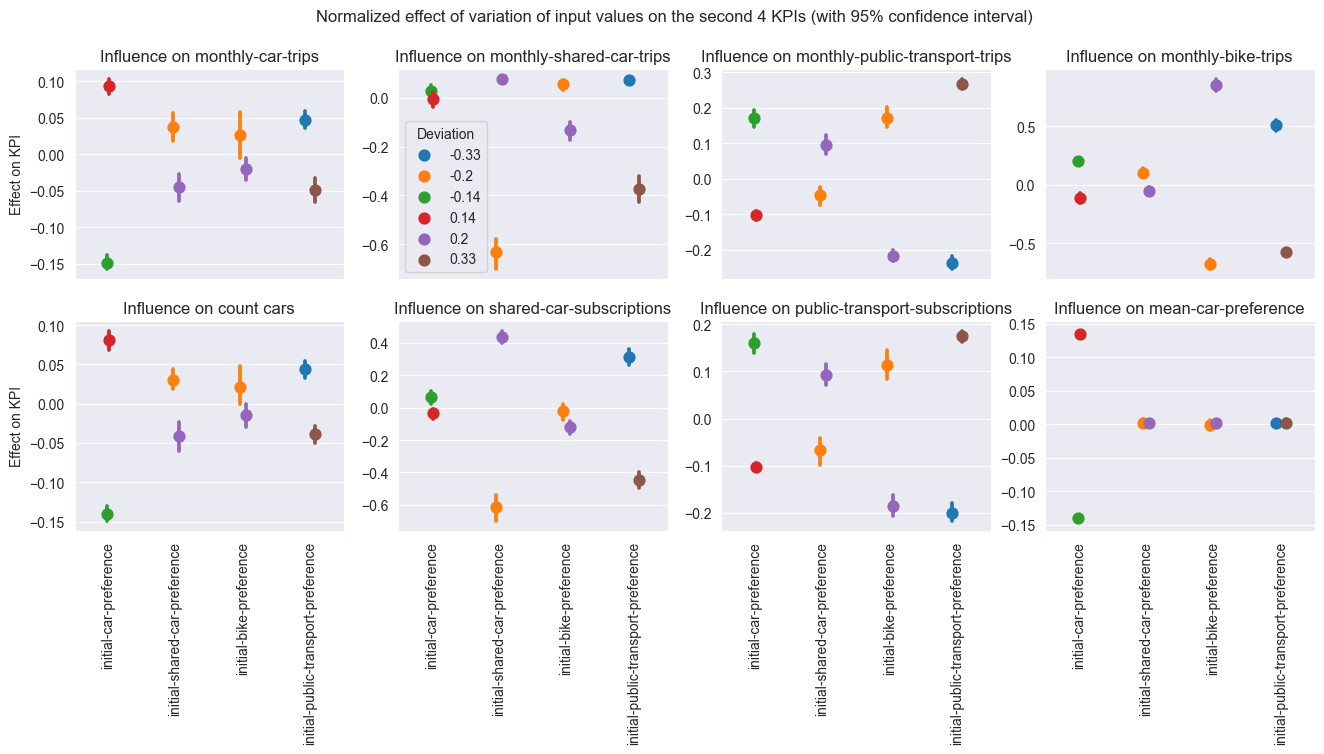

In [18]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(16,6)
g = {}
for i, KPI in enumerate(KPIs2):
    df_t = plot_df[KPI].loc[plot_df[KPI]['Variable'].isin(vars[5:] + ["Reference"])].copy()
    df_t["Deviation"] = (df_t["Deviation"] - 1).round(2)
    g[KPI] = sns.pointplot(df_t, y="Result", x="Variable", hue="Deviation", errorbar=('ci', 95), join=False, dodge=True, label="Result", ax=axes.flat[i])
    g[KPI].set_title(f"Influence on {KPI}")
    g[KPI].set_xticklabels(g[KPI].get_xticklabels(), rotation=90)
    if i <= 3:
        g[KPI].set_xticklabels("")
    g[KPI].set_xlabel("")
    if i == 0 or i == 4:
        g[KPI].set_ylabel("Effect on KPI")
    else:
        g[KPI].set_ylabel("")
    # Remove the legend except the fourth plot
    if i != 1:
        g[KPI].legend_.remove()
fig.suptitle("Normalized effect of variation of input values on the second 4 KPIs (with 95% confidence interval)")
fig.savefig("../images/sensitivity_pointplots_norm_2.svg", bbox_inches="tight")